In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import scipy.linalg as linalg
import sklearn.linear_model
import sklearn.model_selection
import pandas as pd
from sklearn.datasets import make_blobs, make_moons
from sklearn.datasets import load_iris
from IPython.display import Markdown as md
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Applied Machine Learning

## Neural networks

- There are a few ways to understand neural networks
- We will use http://playground.tensorflow.org/
- We will use some code in parallel

### Neuron

Usually, a linear model with a non-linearity (activation)

In [3]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

activation = sigmoid

def linear_model(x, w):
    return sum(x_i*w_i for (x_i, w_i) in zip(x, w))

def neuron(x, w):
    return activation(linear_model(x, w))

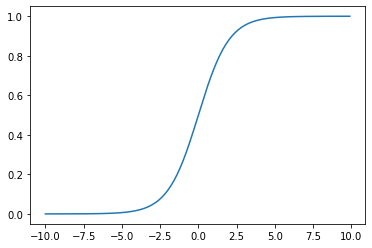

In [4]:
xs = np.arange(-10, 10, 0.1)
plt.plot(xs, list(map(sigmoid, xs)));

### Layer

A set of neurons

In [5]:
def layer(x, w):
    return [neuron(x, w[0]), neuron(x, w[1]), neuron(x, w[2])]

W = [[3.0, 4.0], [4.0, 3.0], [-2.0, 2.0]]
inputs = [1.0, 2.0]
layer(inputs, W)

[0.999983298578152, 0.9999546021312976, 0.8807970779778823]

### Network

A set of layers

In [6]:
def network(x, w):
    return layer(layer(x, w[0]), w[1])

network(
    [1.0, 2.0], 
    [
        [[4.5, -2.5], [5.6, -9.1], [4.1, 5.6]],
        [[-1.2, 3.4], [6.7, 2.3], [9.8, -6.7]]
    ]
)

[0.38863885494001416, 0.9261862443148056, 0.9758700579418047]

### Deep learning

- The approach in machine learning based on composition
- Introduces hierarchy of representations

### Optimization

- The only parameters are `w` of layers
- To cast the problem into optimization we need a target
- In optimization we call it the objective function

### Objective function $L(w)$

- For regression we may use squared loss
- For classification we usually do log-loss (aka cross-entropy)
- We may use any function we want to fit

### Gradient $\nabla L(w)$

- The function that points in the direction of the greatest rate of increase 
- Tells us how to make $w$ better
- To know the gradient is to know how to solve the problem (most of the time)

### Gradient descent

- Start at random $w_0$
- Iterate: $w_{i+1} = w_{i} + \alpha \nabla L(w)$
- Repeat until converged

### Chain rule

- Consider $f(x) = x^2$, $g(x) = \sin x$
- $\frac{d}{dx} g(f(x)) = \frac{d}{dx} g(x) \times \frac{d}{dx} f(x) = \cos x^2 \times 2 x$
- This way one might differentiate (compute gradient) of any function, even neural network

#### Backpropagation = chain rule + gradient descent

### Problems

- Vanishing gradients: ReLU
- Overfitting: dropout, batch normalization, etc
- Performance: GPU

### Keras (some people prefer PyTorch)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) # aka fully connected aka linear layer
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax')) # softmax makes the sum of outputs 1 so that they're probabilities

For full example see https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py